In [1]:
import pandas as pd
import numpy as np

customer_clusters = pd.read_csv("../data/processed/customer_clusters.csv")
X_scaled = np.load("../data/processed/X_scaled.npy")

customer_clusters.head()


,user_id,frequency,monetary,view_count,cart_count,purchase_count,unique_products,unique_categories,unique_brands,recency_days,purchase_ratio,cart_to_purchase_ratio,cluster
0,104655840,1,9.91,1,0,0,1,1,1,0,0.0,0.0,3
1,128968633,18,3515.87,18,0,0,18,3,5,0,0.0,0.0,2
2,176250879,3,1262.40,3,0,0,3,1,1,0,0.0,0.0,0
3,178539771,1,566.27,1,0,0,1,1,1,0,0.0,0.0,3
4,208005640,4,1124.23,4,0,0,4,1,3,0,0.0,0.0,0


In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = customer_clusters['cluster']


In [3]:
pca.explained_variance_ratio_


array([0.47736458, 0.30288892])

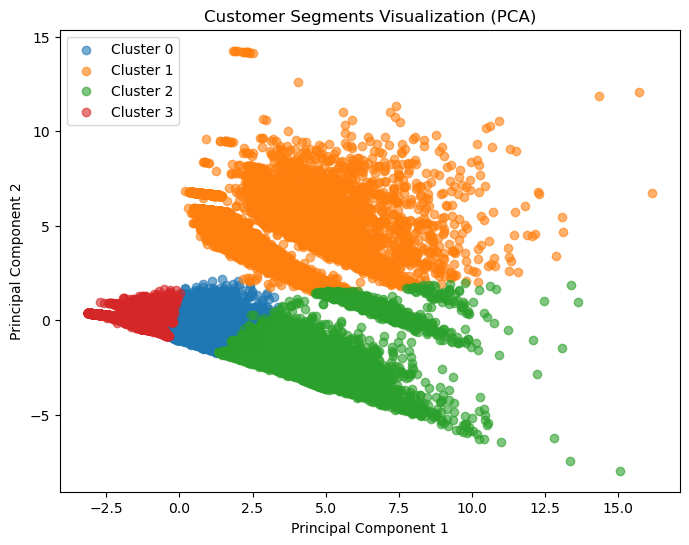

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for cluster_id in sorted(pca_df['cluster'].unique()):
    cluster_data = pca_df[pca_df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['PC1'],
        cluster_data['PC2'],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segments Visualization (PCA)")
plt.legend()
plt.show()


In [5]:
cluster_summary = pd.read_csv("../reports/cluster_summary.csv")
cluster_summary


,cluster,user_id,frequency,monetary,view_count,cart_count,purchase_count,unique_products,unique_categories,unique_brands,recency_days,purchase_ratio,cart_to_purchase_ratio
0,0,5.737364e+08,6.571644,2245.541914,6.309287,0.262357,0.000000,4.033911,1.446953,2.308702,0.0,0.000000,0.000000
1,1,5.789961e+08,12.819586,3716.685682,8.721139,2.685601,1.412847,3.868884,1.389890,2.072548,0.0,0.159237,0.433216
2,2,5.739251e+08,24.417311,7434.853961,23.789588,0.568107,0.059616,14.398220,3.514523,6.311724,0.0,0.001516,0.016995
3,3,5.818718e+08,1.634859,484.531392,1.580304,0.054555,0.000000,1.247391,1.045650,1.108044,0.0,0.000000,0.000000


# Customer Segmentation – Business Insights

## Cluster 0: High-Value Loyal Customers
- High purchase frequency and spending
- Low recency
- Recommended actions: loyalty rewards, personalized offers

## Cluster 1: Frequent Browsers
- High views, low conversion
- Recommended actions: discounts, retargeting, cart reminders

## Cluster 2: Occasional Buyers
- Moderate engagement and spending
- Recommended actions: cross-sell, seasonal promotions

## Cluster 3: Inactive Users
- Low engagement, high recency
- Recommended actions: re-engagement campaigns


I segmented customers using KMeans on behavioral features, validated cluster quality using silhouette scores, visualized clusters using PCA, and translated them into actionable business strategies.